[View in Colaboratory](https://colab.research.google.com/github/denfromufa/deepweather/blob/master/deep_weather.ipynb)

Weather Prediction with Deep Learning (30 minutes)
Denis Akhiyarov
    * Senior Consultant at Wood
    * Python.NET (Python for .NET) core developer
    * Python, VBA, C#, Mathematica, Matlab
    
https://notebooks.azure.com/denfromufa/libraries/pmlc



  <img src="http://pandas.pydata.org/_static/pandas_logo.png" alt="Drawing" style="height: 50px; width: 200px;"/>
  <img src="http://www.numpy.org/_static/numpy_logo.png" alt="Drawing" style="height: 50px; width: 150px;"/>
  <img src="http://jupyter.org/assets/main-logo.svg" alt="Drawing" style="height: 50px; width: 300px;"/>
  <img src="https://matplotlib.org/_static/logo2.svg" alt="Drawing" style="height: 50px; width: 150px;"/>
  <img src="http://seaborn.pydata.org/_images/joint_kde.png" alt="Drawing" style="height: 50px; width: 50px;"/>
  <img src="http://www.sympy.org/static/images/logo.png" alt="Drawing" style="height: 50px; width: 100px;"/>
  
  <img src="https://camo.githubusercontent.com/ee91ac3c9f5ad840ebf70b54284498fe0e6ddb92/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f74665f6c6f676f5f7472616e73702e706e67" alt="Drawing" style="height: 50px; width: 100px;"/>
  <img src="https://camo.githubusercontent.com/0d08dc4f9466d347e8d28a951ea51e3430c6f92c/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6b657261732e696f2f696d672f6b657261732d6c6f676f2d323031382d6c617267652d313230302e706e67" alt=Drawing style="height:50px; width: 100px;"/>
  

In [0]:
import pandas as pd
import numpy as np
from numpy import exp
from IPython.display import HTML, Latex, Math, display
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sympy.printing import latex
from sympy.core.sympify import sympify
%matplotlib inline
pd.options.display.max_columns=50
pd.options.display.max_colwidth=100
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['figure.figsize'] = (3, 2)
fontsize=3
matplotlib.rcParams['figure.titlesize'] = fontsize
matplotlib.rcParams['axes.labelsize'] = fontsize
matplotlib.rcParams['font.size'] = fontsize
matplotlib.rcParams['axes.titlesize'] = fontsize
matplotlib.rcParams['legend.fontsize'] = fontsize
matplotlib.rcParams['xtick.labelsize'] = fontsize
matplotlib.rcParams['ytick.labelsize'] = fontsize
matplotlib.rcParams['lines.markersize'] = 2

Historic data of weather in Houston requested and retrieved from Department of Commerce > NOAA > NESDIS > NCEI

https://www.ncdc.noaa.gov/

Last read the head of the table and look at the data using pandas

In [2]:
dfhtown=pd.read_csv("https://raw.githubusercontent.com/denfromufa/deepweather/master/9693687323818dat.txt", delim_whitespace=True)
dfhtown.head()

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW.1,MW.2,MW.3,AW,AW.1,AW.2,AW.3,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,720617,208,201604010015,***,0,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,79,66,******,29.67,******,***,***,*****,*****,*****,*****,**
1,720617,208,201604010035,330,6,***,722,CLR,*,*,*,9.1,**,**,**,**,**,**,**,**,*,75,66,******,29.66,******,***,***,*****,*****,*****,*****,**
2,720617,208,201604010055,330,3,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,73,66,******,29.67,******,***,***,*****,*****,*****,*****,**
3,720617,208,201604010115,330,6,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,73,66,******,29.68,******,***,***,*****,*****,*****,*****,**
4,720617,208,201604010135,340,7,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,72,64,******,29.70,******,***,***,*****,*****,*****,*****,**


The data is messy, the names of columns not clear, so let's look at html version. Again using pandas!

In [3]:
import sys
!pip install lxml

    100% |████████████████████████████████| 5.7MB 241kB/s 


In [0]:
dfheader=pd.read_html("https://raw.githubusercontent.com/denfromufa/deepweather/master/72061700208-2016-04_9693687323818dat.html")

In [5]:
def pd2html(df, header=False, index=False):
    return HTML(df.to_html(index=False, header=False))
pd2html(dfheader[0])

AWS ID 720617,WBAN ID 00208,Name HOUSTON EXECUTIVE AIRPORT,Country UNITED STATES,State TEXAS,Latitude +29.800,Longitude -095.900,Elevation +0051.2 (meters)


In [6]:
pd2html(dfheader[1][:2])

USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


Let's set the index of dataframe (table) to dates

In [7]:
dfhtown.set_index(dfhtown.columns[2], inplace=True)
dfhtown.head(3)

,USAF,WBAN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW.1,MW.2,MW.3,AW,AW.1,AW.2,AW.3,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
YR--MODAHRMN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201604010015,720617,208,***,0,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,79,66,******,29.67,******,***,***,*****,*****,*****,*****,**
201604010035,720617,208,330,6,***,722,CLR,*,*,*,9.1,**,**,**,**,**,**,**,**,*,75,66,******,29.66,******,***,***,*****,*****,*****,*****,**
201604010055,720617,208,330,3,***,722,CLR,*,*,*,10.0,**,**,**,**,**,**,**,**,*,73,66,******,29.67,******,***,***,*****,*****,*****,*****,**


In [8]:
dfhtown.index=pd.to_datetime(dfhtown.index, format="%Y%m%d%H%M")
dfhtown.index.name='datetime'
dfhtown.replace(to_replace='\*+', value=np.nan, regex=True, inplace=True)
dfhtown.dropna(axis=1, inplace=True, how='all')
dfhtown.head()

,USAF,WBAN,DIR,SPD,GUS,CLG,SKC,VSB,AW,TEMP,DEWP,ALT
datetime,,,,,,,,,,,,
2016-04-01 00:15:00,720617,208,NaN,0,NaN,722,CLR,10.0,NaN,79,66,29.67
2016-04-01 00:35:00,720617,208,330,6,NaN,722,CLR,9.1,NaN,75,66,29.66
2016-04-01 00:55:00,720617,208,330,3,NaN,722,CLR,10.0,NaN,73,66,29.67
2016-04-01 01:15:00,720617,208,330,6,NaN,722,CLR,10.0,NaN,73,66,29.68
2016-04-01 01:35:00,720617,208,340,7,NaN,722,CLR,10.0,NaN,72,64,29.70


Let's look at subset of columns with physical units from HTML version of the table

In [9]:
dfunits=dfheader[1][:2]
dfunits

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
1,NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


In [10]:
dfunits.rename(columns=dfunits.iloc[0]).iloc[1].loc[dfhtown.columns].dropna().to_frame()

,1
SPD,MPH
GUS,MPH
VSB,Miles
TEMP,F
DEWP,F
ALT,inches


* So SPD and GUS are some velocity measurements for wind
* VSB??
* TEMP - temperature
* DEWP - temperature dewpoint (used for humidity)
* ALT - perhaps the pressure in inches of liquid, such as mercury

The types of columns are very generic (object), so let's improve this!

In [11]:
dfhtown.dtypes

USAF     int64
WBAN     int64
DIR     object
SPD     object
GUS     object
CLG     object
SKC     object
VSB     object
AW      object
TEMP    object
DEWP    object
ALT     object
dtype: object

In [12]:
dfhtown = dfhtown[['DIR','SPD','VSB','TEMP','DEWP','ALT']].astype('float64',raise_on_error=False)
dfhtown.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the raise_on_error=False keyword is deprecated, use errors='ignore' instead
  """Entry point for launching an IPython kernel.


,DIR,SPD,VSB,TEMP,DEWP,ALT
datetime,,,,,,
2016-04-01 00:15:00,NaN,0.0,10.0,79.0,66.0,29.67
2016-04-01 00:35:00,330.0,6.0,9.1,75.0,66.0,29.66
2016-04-01 00:55:00,330.0,3.0,10.0,73.0,66.0,29.67
2016-04-01 01:15:00,330.0,6.0,10.0,73.0,66.0,29.68
2016-04-01 01:35:00,340.0,7.0,10.0,72.0,64.0,29.70


In [13]:
dfhtown.dtypes

DIR     float64
SPD     float64
VSB     float64
TEMP    float64
DEWP    float64
ALT     float64
dtype: object

The relative humidity (RH) is not given in table, so let's calculate using measured temperature and dewpoint temperature

In [0]:
rel_hum_eqn = "100*(exp((17.625*TD)/(243.04+TD))/exp((17.625*T)/(243.04+T)))"


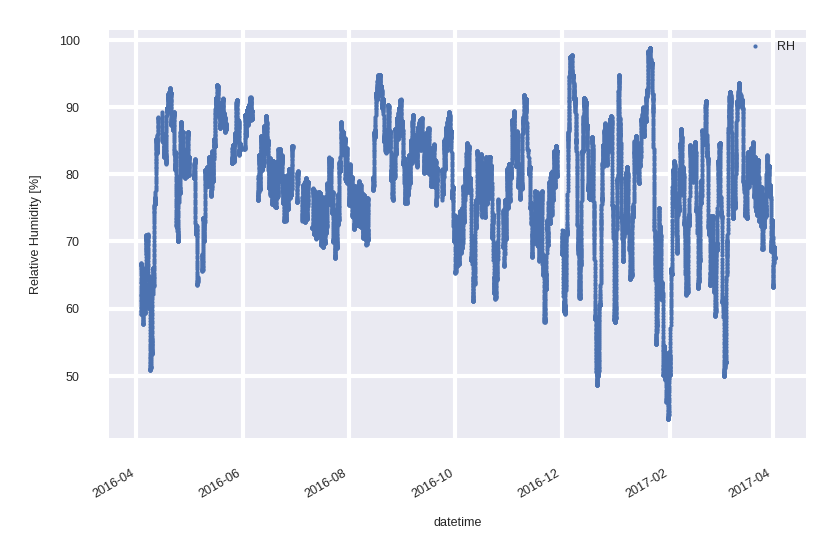

In [15]:
dfhtown['T']=(dfhtown['TEMP']-32)/1.8
dfhtown['TD']=(dfhtown['DEWP']-32)/1.8
dfhtown['RH']=dfhtown.eval(rel_hum_eqn)
dfhtown[['RH']].rolling(window=24*7).mean().plot(style='.');
plt.ylabel('Relative Humidity [%]');

In [16]:
dfhtown.describe()

,DIR,SPD,VSB,TEMP,DEWP,ALT,T,TD,RH
count,20087.000000,25833.000000,23997.000000,25844.000000,25844.000000,25853.000000,25844.000000,25844.000000,25844.000000
mean,168.682232,6.866527,8.109147,71.196835,63.041751,30.041237,21.776019,17.245417,78.277455
std,108.760045,5.283873,2.605837,12.736647,13.240728,0.162329,7.075915,7.355960,19.340430
min,10.000000,0.000000,0.000000,19.000000,10.000000,29.450000,-7.222222,-12.222222,17.552120
25%,110.000000,3.000000,7.000000,64.000000,57.000000,29.950000,17.777778,13.888889,64.138382
50%,170.000000,7.000000,9.100000,73.000000,66.000000,30.020000,22.777778,18.888889,83.472995
75%,200.000000,10.000000,10.000000,81.000000,73.000000,30.130000,27.222222,22.777778,93.564177
max,990.000000,36.000000,10.000000,99.000000,81.000000,30.790000,37.222222,27.222222,100.000000


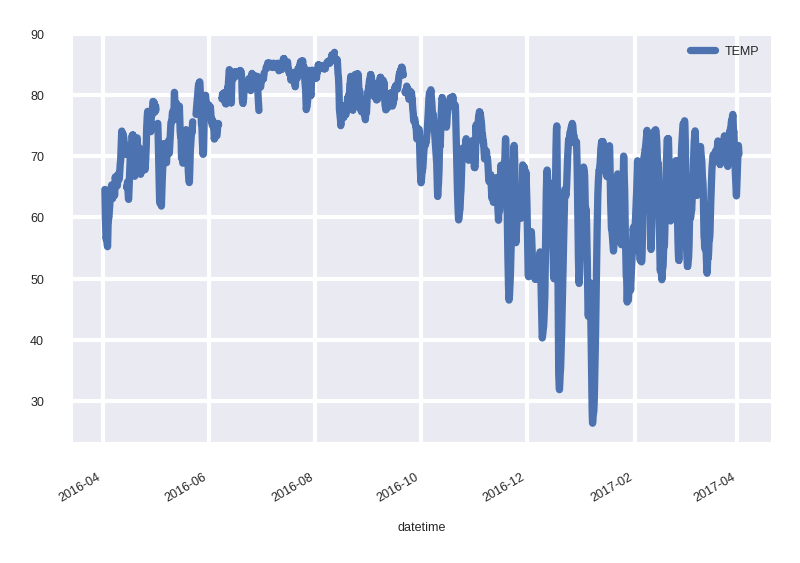

In [17]:
dfhtown.rolling(window=72).mean()[['TEMP']].plot();


The vapor pressure answers will be in units of millibars (mb) or hectoPascals (hPa).
To convert the saturated vapor pressure and/or the actual vapor pressure, the
temperature values must be converted to degrees Celsius (°C) .

In [0]:
vp='6.11*(10**((7.5*{T})/(237.3+{T})))'
dfhtown['e']=0.1*dfhtown.eval(vp.format(T='TD')) #converted from hPa to kPa
dfhtown['es']=0.1*dfhtown.eval(vp.format(T='T')) #converted from hPa to kPa

Let's verify calculation

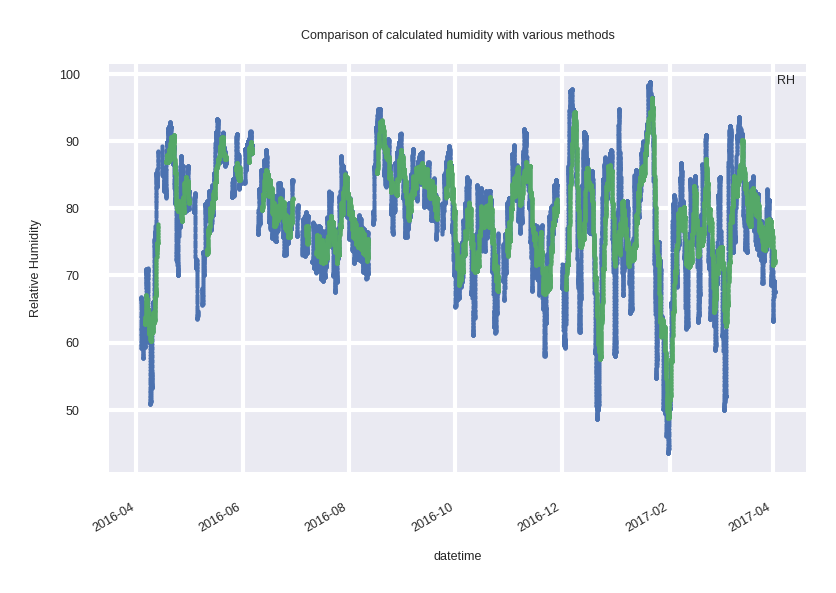

In [19]:
ax1=dfhtown[['RH']].rolling(window=24*7).mean().plot(style='.')
(dfhtown.e/dfhtown.es*100.).rolling(window=24*7*2).mean().plot(style='.',ax=ax1)
plt.ylabel('Relative Humidity')
plt.title('Comparison of calculated humidity with various methods');

Back to apparent temperature (AT)!

In [0]:
AT = "-2.7 + 1.04*T + 2.0*e -0.65*v"

In [0]:
dfhtown['v']=dfhtown.SPD*0.44704 #MPH to m/s

In [0]:
dfhtown['AT']=dfhtown.eval(AT)

Text(0,0.5,'Delta T [deg. C]')

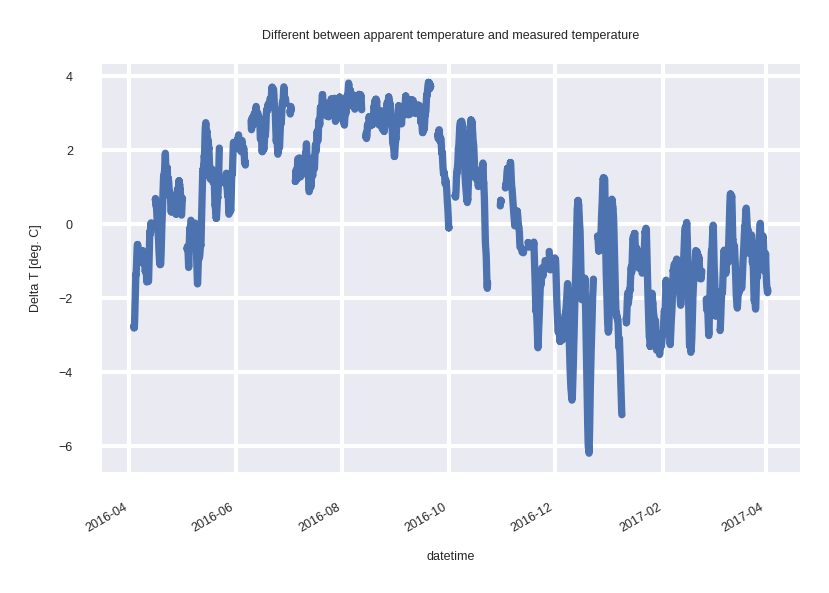

In [23]:
plt.figure()
dfhtown.eval('AT-T').rolling(window=7*24).mean().plot()
plt.title('Different between apparent temperature and measured temperature')
plt.ylabel('Delta T [deg. C]')

Comfortable apparent temperature **22-27** deg. C

https://en.wikipedia.org/wiki/Thermal_comfort

In [0]:
ixat = (dfhtown.AT>22) & (dfhtown.AT<27)

Comfortable hours to spend time outdoors are between 7am and 8pm

In [0]:
dfhtown['hour']=dfhtown.index.map(lambda x: x.hour)
ixhr = (dfhtown.AT>7) & (dfhtown.hour<20)

When humidity is above 95% - very high chances of rain! So not good for outdoors...

In [0]:
ixrh = dfhtown.RH<95

In [27]:
dfhtown[ixat & ixhr & ixrh].resample("H").sum().resample('M').AT.count()[:-1]
#.plot()
#plt.ylabel('Total hours comfortable outdoors in a month');

datetime
2016-04-30    720
2016-05-31    744
2016-06-30    720
2016-07-31    744
2016-08-31    744
2016-09-30    720
2016-10-31    744
2016-11-30    720
2016-12-31    744
2017-01-31    744
2017-02-28    672
2017-03-31    744
Freq: M, Name: AT, dtype: int64

Preparing the data

The exact formulation of our problem will be the following: given data going as far back as lookback timesteps (a timestep is 10 minutes) and sampled every steps timesteps, can we predict the temperature in delay timesteps?

We will use the following parameter values:

lookback = 720, i.e. our observations will go back 5 days.
steps = 6, i.e. our observations will be sampled at one data point per hour.
delay = 144, i.e. our targets will be 24 hours in the future.
To get started, we need to do two things:

Preprocess the data to a format a neural network can ingest. 
This is easy: the data is already numerical, so we don't need to do any vectorization. 
However each timeseries in the data is on a different scale (e.g. temperature is typically between -20 and +30, but pressure, measured in mbar, is around 1000). 
So we will normalize each timeseries independently so that they all take small values on a similar scale.
Write a Python generator that takes our current array of float data and yields batches of data from the recent past, alongside with a target temperature in the future. Since the samples in our dataset are highly redundant (e.g. sample N and sample N + 1 will have most of their timesteps in common), it would be very wasteful to explicitly allocate every sample. Instead, we will generate the samples on the fly using the original data.
We preprocess the data by subtracting the mean of each timeseries and dividing by the standard deviation. We plan on using the first 200,000 timesteps as training data, so we compute the mean and standard deviation only on this fraction of the data: